# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Motivation

The aim of choosing this dataset is to find out which factors are more important to make life happier. Also, which continents are happier, what makes them happier and what factors are more important to be happy on different continents.Therefore, countries can focus on more significant factors to reach happier society. 

## Research Questions

First of all, we will focus on data whether there exist  missing values and outliers.
The effect of low and high GDP per capita on other factors by ttest. 
Then, which factors affects the happiness score more and we will find out what factor affects the most in which continent.
Correlation between factors for each continent by heatmap.
How changed variaables between 2015-2019 in the world.
I will compare some countries between 2015-2019.

## Definition of Variables

GDP per capita: GDP per capita is a measure of a country's economic output that accounts for its number of people.

Family or Social support: Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.

Healthy life expectancy: Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.

Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

Generosity:the quality of being kind and generous.

Perceptions of corruption: The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values.

Dystopia Residual compares each countries scores to the theoretical unhappiest country in the world.

The columns; GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.



## Table of Content

Motivation

Research Questions

Definition of Variables

General Information about Data

Checking Missing Values

Checking Outliers

Visualization
    
    The Number of Countries in each Continent
    
    The Effect of Variables on Happiness Score
    
    The Effect of each Variable on Happiness Score in each Continent 
    
    Correlation between Variables
        Correlation between Variables in the World
        Correlation between Variables for each Continent
    
    Geographical Visualization of Happiness Score 
    
    Change of Variables by Year
    
    Happiness Score Comparison for some Countries
    
    Top 10 Countries Increased and Decreased Their Happiness between 2015-2019
    
    PCA Analysis
Conclusion

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import plotly
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

### General Information about Data

In [2]:
df=pd.read_csv('datasets_894_813759_2015.csv')

In [4]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df['Year']=2015

In [7]:
df.columns=['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual', 'Year']

In [8]:
df.head()

Country          Region  Happiness_Rank  Happiness_Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard_Error  Economy_GDP_per_Capita   Family  Health_Life_Expectancy  \
0         0.03411                 1.39651  1.34951                 0.94143   
1         0.04884                 1.30232  1.40223                 0.94784   
2         0.03328                 1.32548  1.36058                 0.87464   
3         0.03880                 1.45900  1.33095                 0.88521   
4         0.03553                 1.32629  1.32261                 0.90563   

   Freedom  Trust_Government_Corruption  Generosity  Dystopia_Residual  Year  
0  0.66557                      0.41978     0.29678            2.51738  2015  
1  0.62877                      0.14145     0.43630            2.70201  2015  
2  0.64938                      0.48357     0.34139            2.49204  2015  
3  0.66973                      0.36503     0.34699            2.46531  2015  
4  0.63297                      0.32957     0.45811            2.45176  2015

In [9]:
df.describe()

Happiness_Rank  Happiness_Score  Standard_Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy_GDP_per_Capita      Family  Health_Life_Expectancy     Freedom  \
count              158.000000  158.000000              158.000000  158.000000   
mean                 0.846137    0.991046                0.630259    0.428615   
std                  0.403121    0.272369                0.247078    0.150693   
min                  0.000000    0.000000                0.000000    0.000000   
25%                  0.545808    0.856823                0.439185    0.328330   
50%                  0.910245    1.029510                0.696705    0.435515   
75%                  1.158448    1.214405                0.811013    0.549092   
max                  1.690420    1.402230                1.025250    0.669730   

       Trust_Government_Corruption  Generosity  Dystopia_Residual    Year  
count                   158.000000  158.000000         158.000000   158.0  
mean                      0.143422    0.237296           2.098977  2015.0  
std                       0.120034    0.126685           0.553550     0.0  
min                       0.000000    0.000000           0.328580  2015.0  
25%                       0.061675    0.150553           1.759410  2015.0  
50%                       0.107220    0.216130           2.095415  2015.0  
75%                       0.180255    0.309883           2.462415  2015.0  
max                       0.551910    0.795880           3.602140  2015.0

### Checking Missing Values

In [10]:
df.isnull().sum()

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
Year                           0
dtype: int64

So there is no missing values in our data

### Checking Outliers

Let's check each variable by boxplot 

In [11]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 12 }

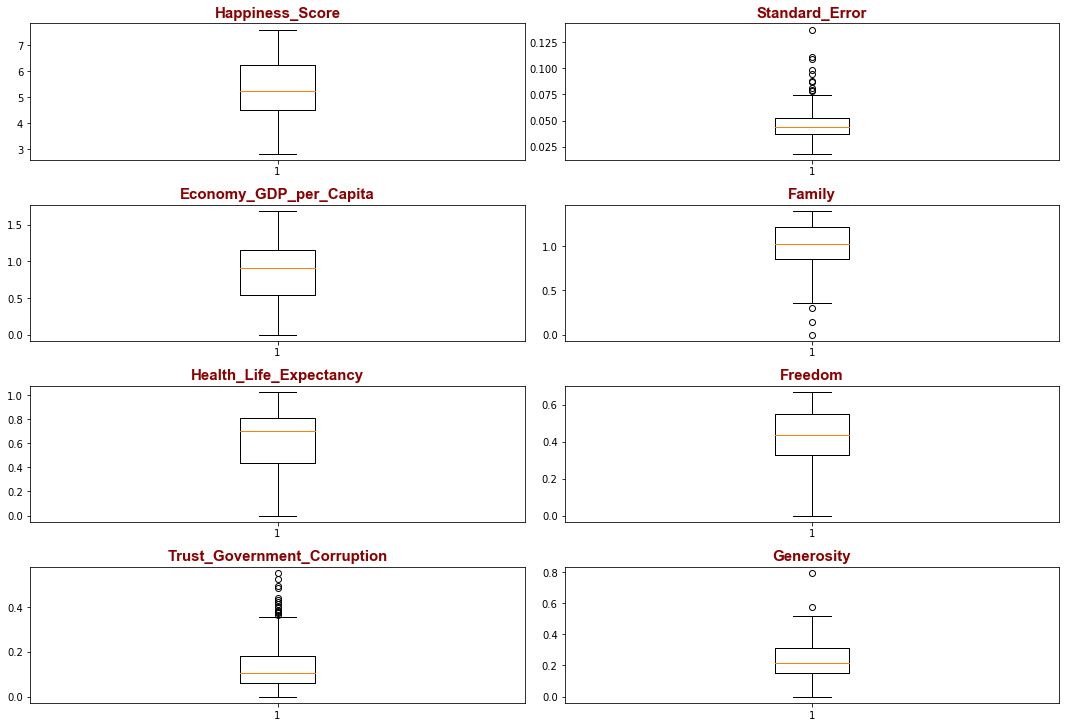

In [12]:
plt.figure(figsize=(15,15))
for i,column in enumerate(df.columns[3:-2]):    
    plt.subplot(6,2,i+1)
    plt.boxplot(df[column])
    plt.title(column, fontdict=title_font)
plt.tight_layout()
plt.show()

Trust Government Corruption have some outliers. And now check outliers by zscore

In [13]:
from scipy.stats import zscore
for column in df.columns[3:]:
    z_scores = zscore(df[column])
    print(column)
    for threshold in range(1,4):    
        print("Threshold value: {}".format(threshold))
        print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('-'*50)
        

Happiness_Score
Threshold value: 1
Number of Outliers: 30
Threshold value: 2
Number of Outliers: 0
Threshold value: 3
Number of Outliers: 0
--------------------------------------------------
Standard_Error
Threshold value: 1
Number of Outliers: 21
Threshold value: 2
Number of Outliers: 7
Threshold value: 3
Number of Outliers: 3
--------------------------------------------------
Economy_GDP_per_Capita
Threshold value: 1
Number of Outliers: 29
Threshold value: 2
Number of Outliers: 1
Threshold value: 3
Number of Outliers: 0
--------------------------------------------------
Family
Threshold value: 1
Number of Outliers: 24
Threshold value: 2
Number of Outliers: 0
Threshold value: 3
Number of Outliers: 0
--------------------------------------------------
Health_Life_Expectancy
Threshold value: 1
Number of Outliers: 27
Threshold value: 2
Number of Outliers: 0
Threshold value: 3
Number of Outliers: 0
--------------------------------------------------
Freedom
Threshold value: 1
Number of Outl

Trust Government Corruption has 2 outliers after 3 threshold value. 
Let's winsorize it.

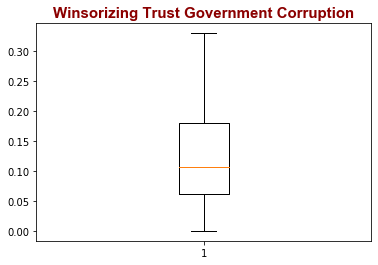

In [14]:
winsorizing_trust_govern_corruption= winsorize(np.array(df['Trust_Government_Corruption']), (0.0, 0.10))
winsorizing_trust_govern_corruption
plt.boxplot(winsorizing_trust_govern_corruption)
plt.title("Winsorizing Trust Government Corruption", fontdict=title_font)
plt.show()

No more outliers exist.

Let's create a new column for Economy GDP per Capita, 
and compare effect of high and low GDPs on other variables. 

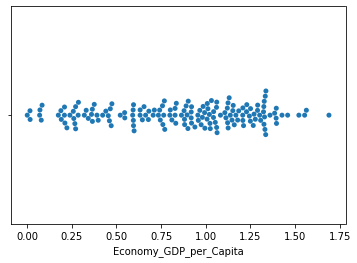

In [15]:
sns.swarmplot(df['Economy_GDP_per_Capita'])
plt.show()

There is a distinction at 0.5 and 1.30 so I'll take them as the point of high, medium and low parts.

In [16]:
def new_column(Economy_GDP_per_Capita):
    if Economy_GDP_per_Capita >= 1.30:
        return 'high'
    elif (Economy_GDP_per_Capita < 1) and (Economy_GDP_per_Capita >= 0.5):
        return 'medium'
    else:
        return 'low'

In [17]:
df['Economy_GDP_per_Capita_Group'] = df['Economy_GDP_per_Capita'].apply(new_column)
df.groupby('Economy_GDP_per_Capita_Group')['Economy_GDP_per_Capita'].count()

Economy_GDP_per_Capita_Group
high      22
low       82
medium    54
Name: Economy_GDP_per_Capita, dtype: int64

In [18]:
clm=['Happiness_Score','Family','Health_Life_Expectancy','Freedom','Trust_Government_Corruption','Generosity']
for col in clm:
    ttest_col=stats.ttest_ind(df[df['Economy_GDP_per_Capita_Group']=='high'][col],
                         df[df['Economy_GDP_per_Capita_Group']=='low'][col])
    print(col)
    print(ttest_col)
    print('-'*50)

Happiness_Score
Ttest_indResult(statistic=7.519763331625991, pvalue=2.206911266223304e-11)
--------------------------------------------------
Family
Ttest_indResult(statistic=4.523456007216671, pvalue=1.647801626477681e-05)
--------------------------------------------------
Health_Life_Expectancy
Ttest_indResult(statistic=4.911380515886999, pvalue=3.4508842051064607e-06)
--------------------------------------------------
Freedom
Ttest_indResult(statistic=6.821982539602992, pvalue=6.524398955399608e-10)
--------------------------------------------------
Trust_Government_Corruption
Ttest_indResult(statistic=8.840228806554528, pvalue=2.97811276758263e-14)
--------------------------------------------------
Generosity
Ttest_indResult(statistic=3.1460436863949055, pvalue=0.002169244405104277)
--------------------------------------------------


For countries having high and low GDP per Capita, Happiness Score,Family, Health Life Expectancy,Freedom, Trust Government Corruption and Generosity are different since p values are less than 0.05

## Visualization

### Number of Countries for each Continent

In [19]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [20]:
df_region=df.groupby('Region')['Country'].count()

In [21]:
df_region2=df_region.reset_index()

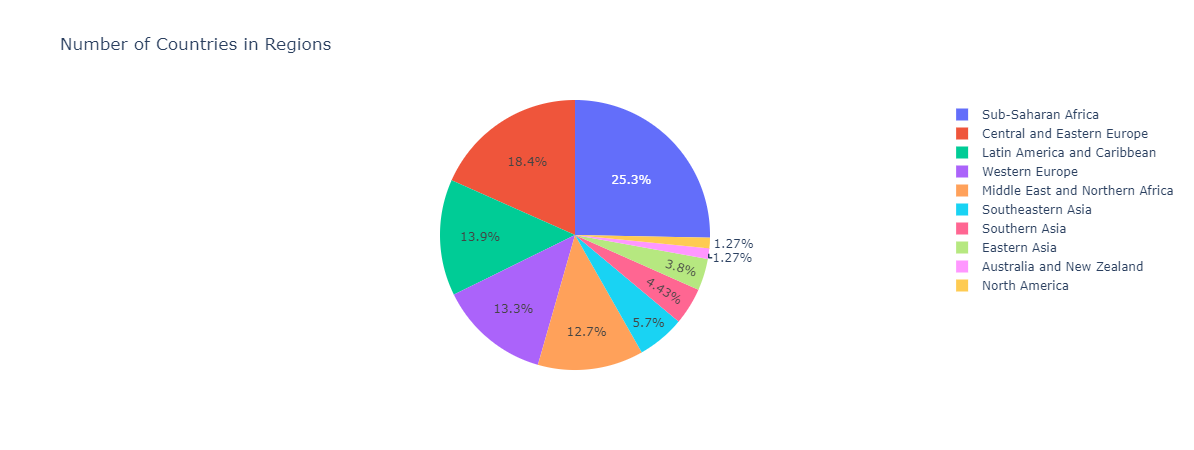

In [22]:
fig=px.pie(df_region2, values='Country',title='Number of Countries in Regions', names='Region')
fig.show()

### The Effect of Variables on Happiness Score

In [23]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 17 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 12 }

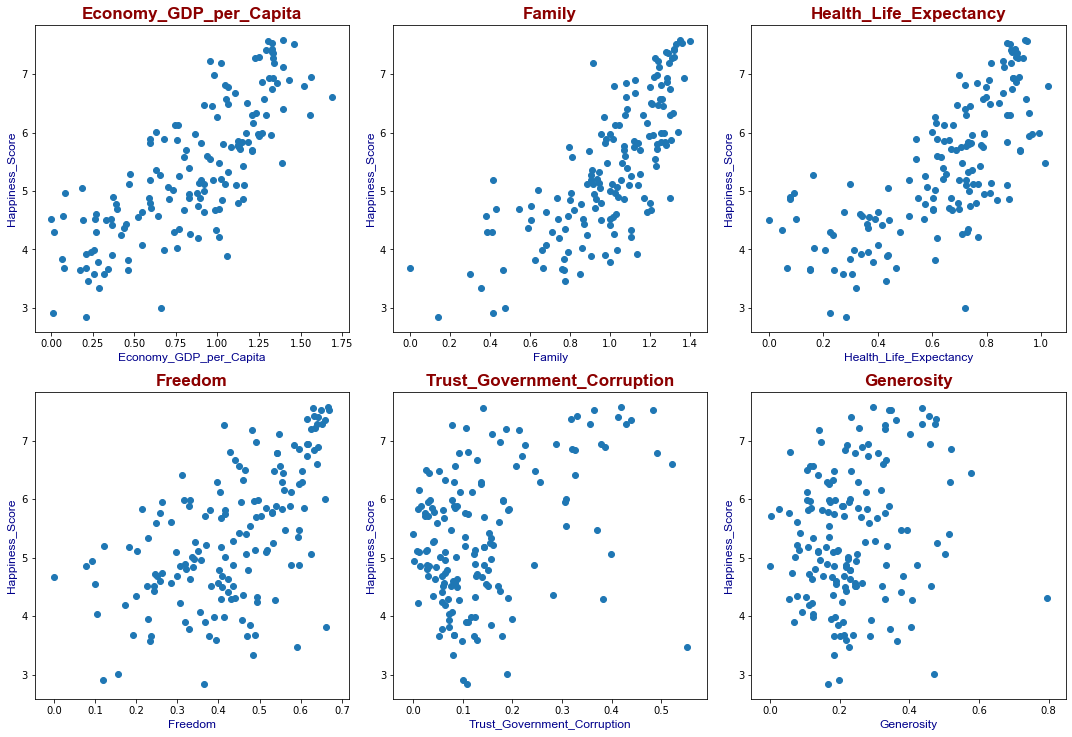

In [24]:
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns[5:-3]):
    plt.subplot(3,3,i+1)
    plt.scatter(df[col],df.Happiness_Score)
    plt.title(col,title_font)
    plt.ylabel('Happiness_Score',axis_style)
    plt.xlabel(col,axis_style)
plt.tight_layout()
plt.show()

GDP per Capita, Family and Health life Expectancy have linear relation with Happiness.Also, Happiness is high in countries in which have more freedom. Generosity has the lowest relation with Happiness. 

### The Effect of Variables for each Continent

Let's look at the effect of each variable on different continents.

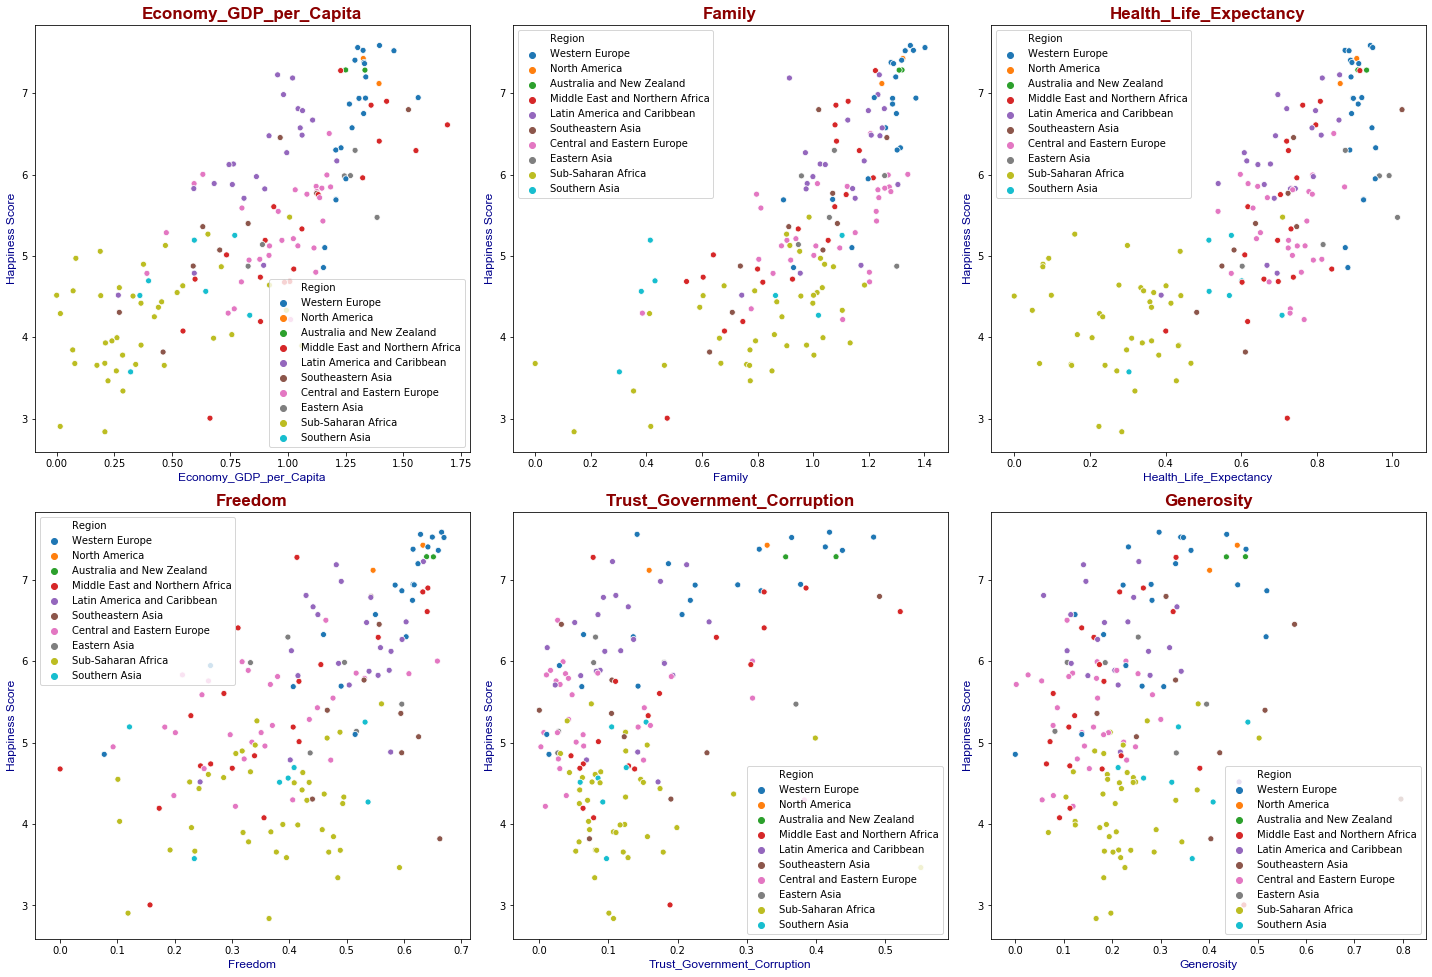

In [25]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[5:-3]):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df,x=col,y='Happiness_Score', hue='Region')
    plt.title(col,title_font)
    plt.ylabel('Happiness Score',axis_style)
    plt.xlabel(col,axis_style)
plt.tight_layout()
plt.show()

When we look at the Economy GDP per Capita vs Happiness Score graph, for Sub-Saharan Africa, even if GDP per Capita inceases, happiness score affected not so much. So, there is something different in Sub-Saharan Africa that makes people happy.

### Detailed Visulization of Variable Effects on Continents

And now let's see more detailed scatter plot for each continent for each variable

In [103]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 17 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 12 }

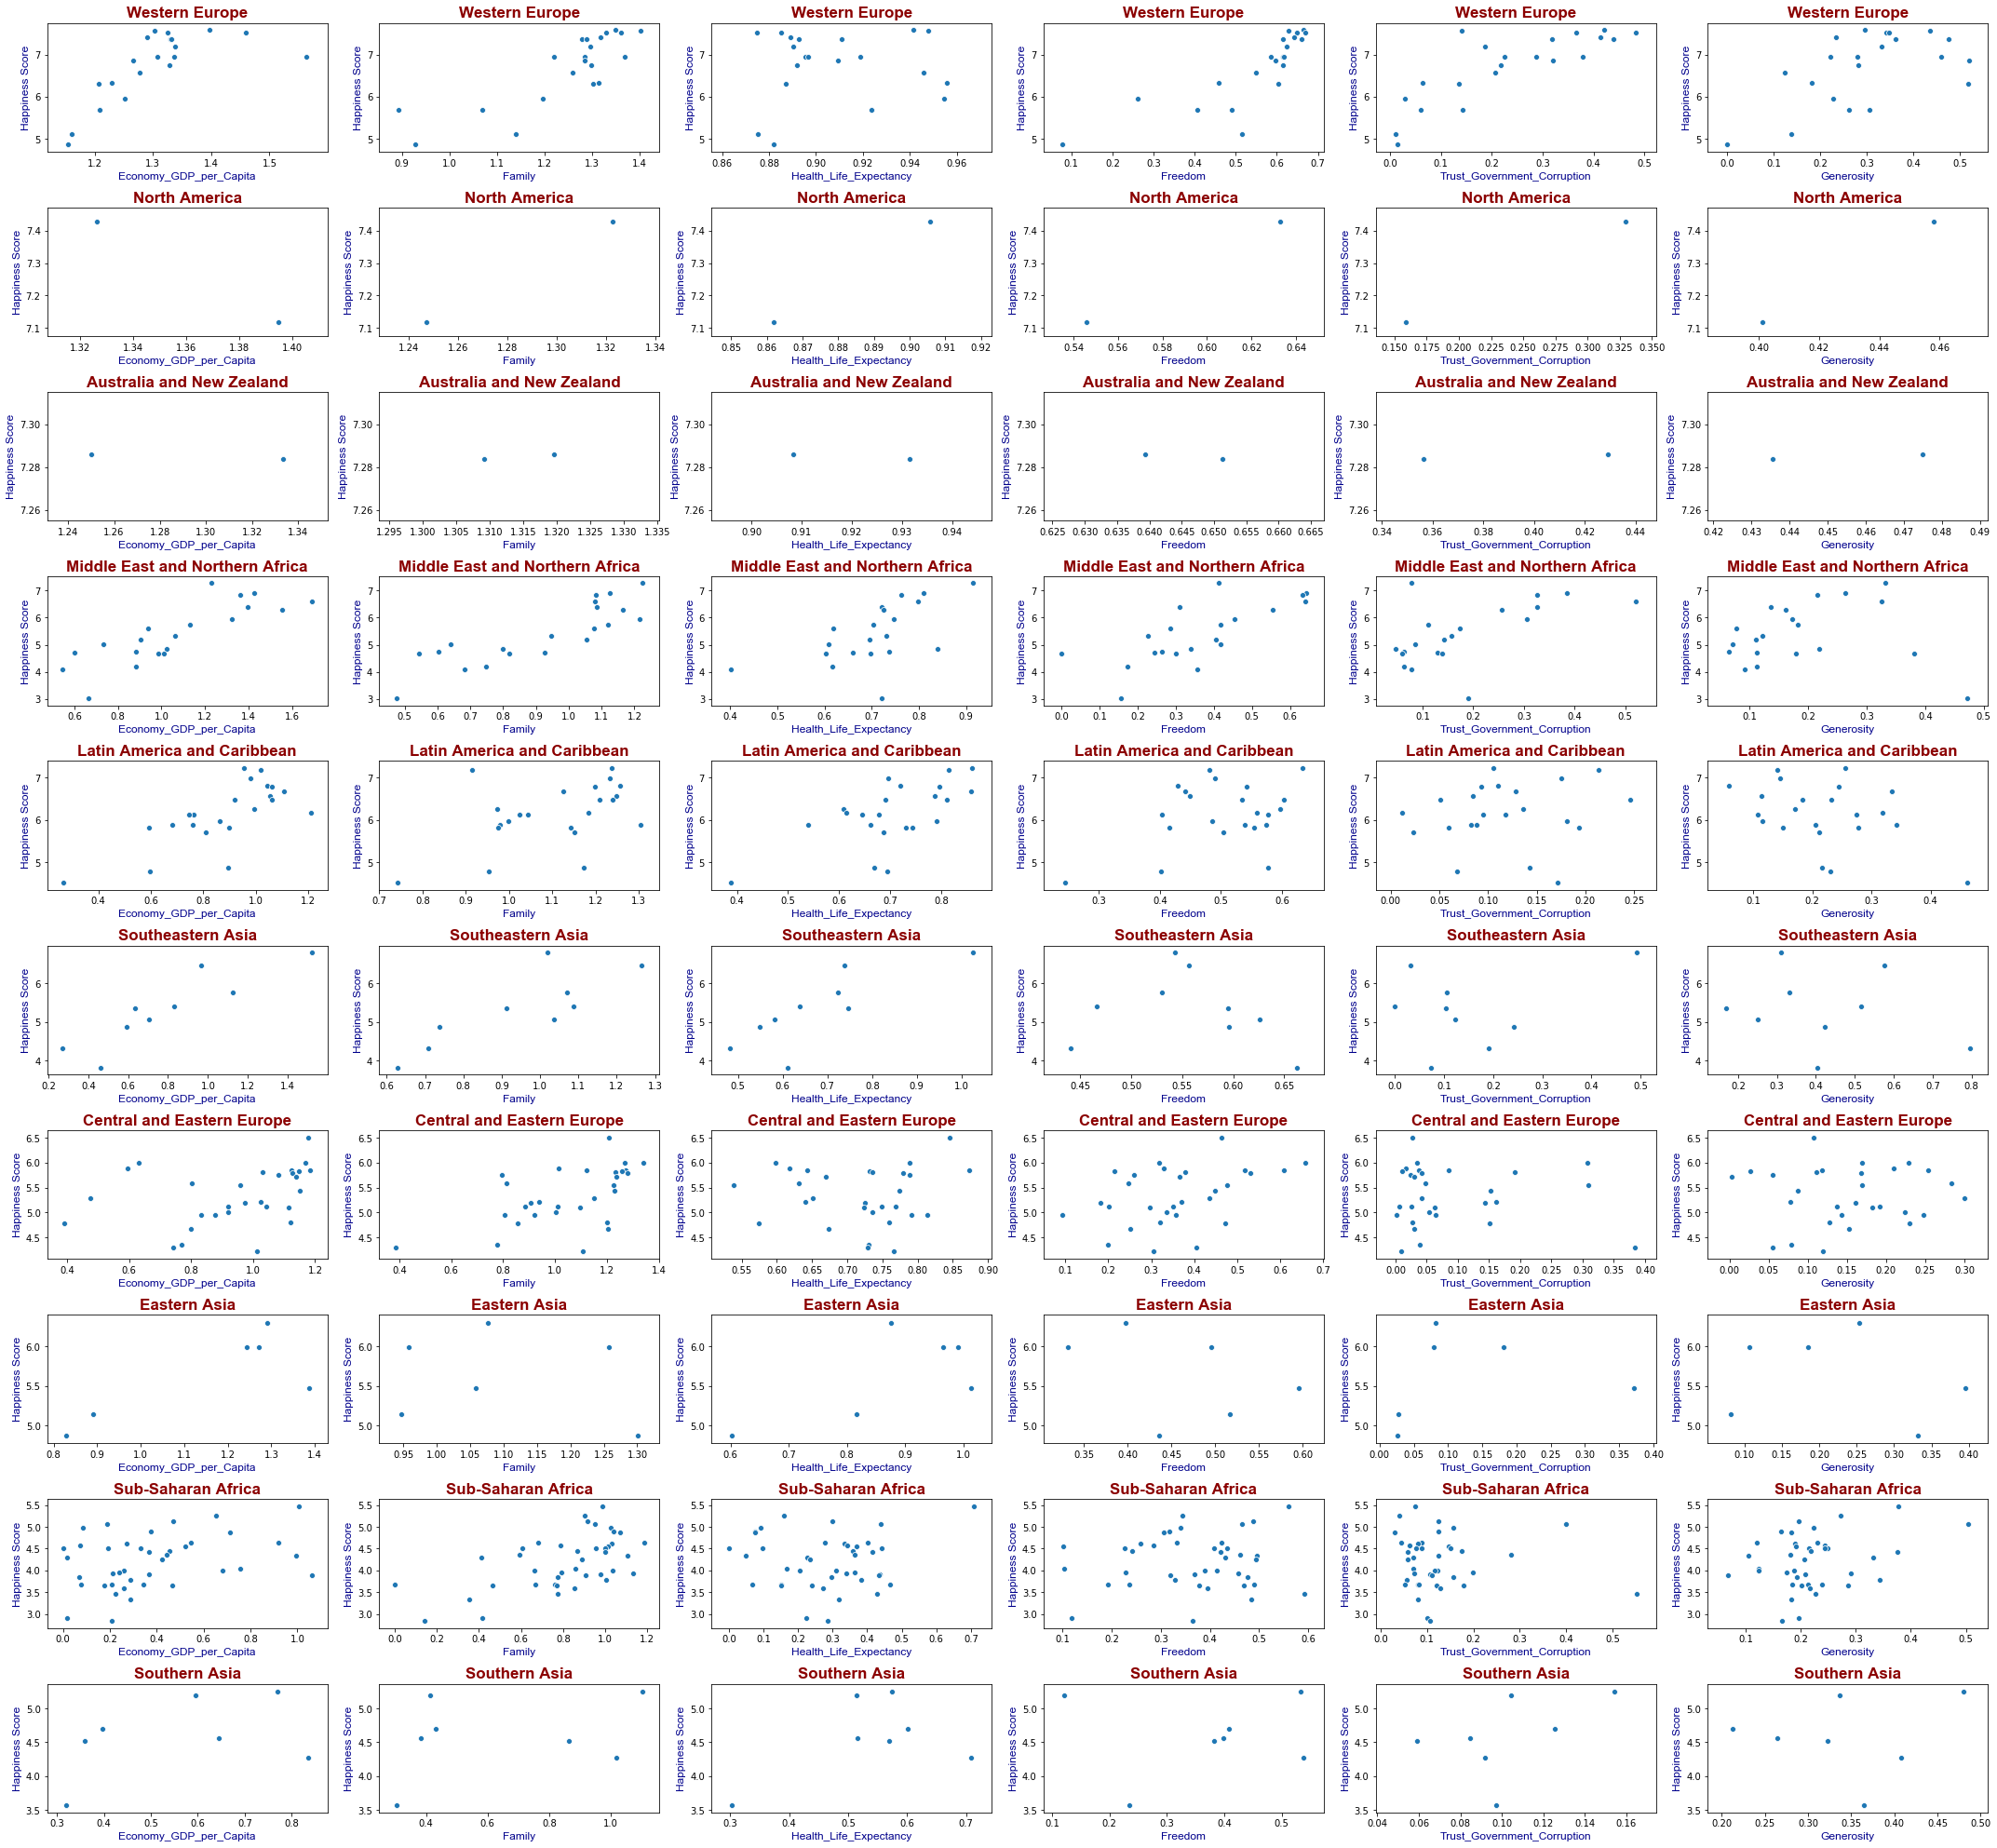

In [104]:
plt.figure(figsize=(30,30))
for i,region in enumerate(df.Region.unique()):   
    df_region=df[df['Region']==region]
    for j, col in enumerate(df.columns[5:-3]):
        a=(len(df.columns[5:-3])*i)+j+1
        plt.subplot(11,6,a)
        sns.scatterplot(data=df_region,x=col,y='Happiness_Score')
        plt.title(region,title_font)
        plt.ylabel('Happiness Score',axis_style)
        plt.xlabel(col,axis_style)
plt.tight_layout()
plt.show()   

#### Comments

For Western Europe, GDP per Capita, Family,Freedom, Goverment Trust and Generosity are important. Health life Expectancy has minimum effect.

Since there are only 2 countries in North America, and Australia and New Zealand, I can't say one variable has more effect than others on happiness.

For Middle East and Northern Africa, GDP per Capita and Family are important factors for happiness. Then it seems like Freedom is also effective . Health life Expectancy and Goverment Trust have less effects then others. Generosity has the lowest effect in Middle East and Northern Africa.

For Latin America and Caribbean, GDP per Capita  is effective as in other continents. Although Government Trust is low in some countries, people are happy. Health life Expectancy is more important in Latin America and Caribbean countries. Then come Family,Freedom and Generosity.

For Southeastern Asia, GDP per Capita, Family and Health life Expectancy have linear relation with happiness. Freedom, Goverment Trust and Generosity are less effective in Southeastern Asia.

For Central and Eastern Europe,some countries having high GDP per Capita have still low happiness. Family, Freedom, Health life Expectancy and Generosity are same as GDP per Capita. Goverment Trust  has really low effect in happiness.

Since there are a few countries in  Eastern Asia and Southern Asia, different variables have different effects on happiness.

For Sub-Saharan Africa, Family seems like most important factor and Goverment Trust is least effective factor for happiness. Some countries having high GDP per Capita are still low happiness score.Some countries having low Health life Expectancy have still high happiness. Freedom and Generosity have very little effect on happiness.

### Average Happiness Score of each Continent

Let's look at the average happiness score of each continent.

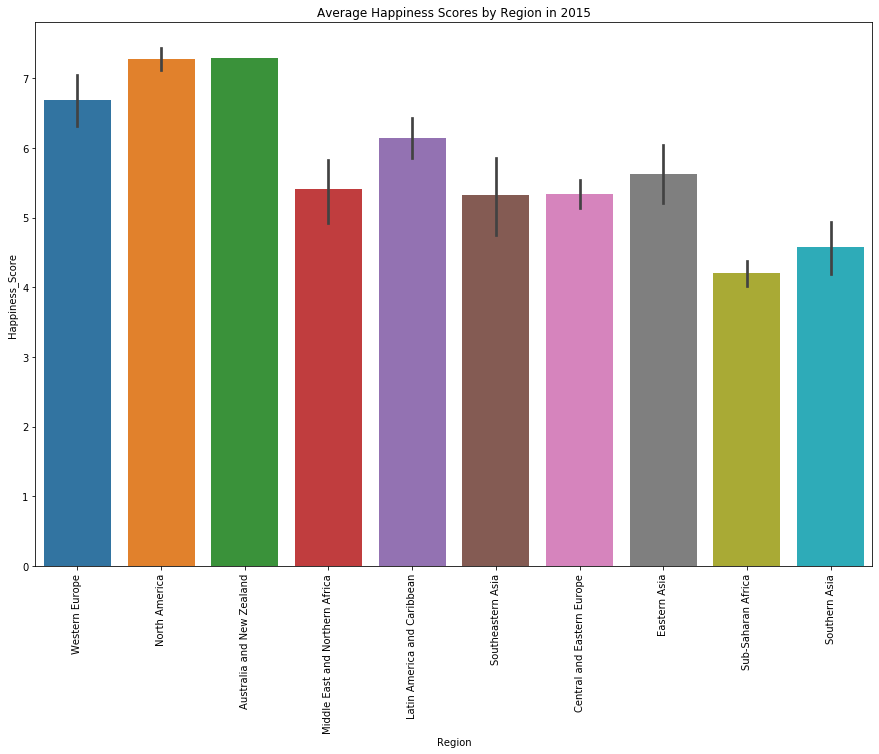

In [102]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'Region', y = 'Happiness_Score', data = df)
plt.xticks(rotation = 90)
plt.title('Average Happiness Scores by Region in 2015')
plt.show()

It seems like Central and Eastern Europe and Southern Asia have same average Happiness score. Let's look at them their ttest values

In [29]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [30]:
clm=['Happiness_Score','Economy_GDP_per_Capita','Family','Health_Life_Expectancy','Freedom','Trust_Government_Corruption','Generosity']
for col in clm:
    ttest_col=stats.ttest_ind(df[df['Region']=='Central and Eastern Europe'][col],
                         df[df['Region']=='Southern Asia'][col])
    print(col)
    print(ttest_col)
    print('-'*50)

Happiness_Score
Ttest_indResult(statistic=3.1306321833380353, pvalue=0.0035731474077002443)
--------------------------------------------------
Economy_GDP_per_Capita
Ttest_indResult(statistic=4.195008920399033, pvalue=0.0001845248437925494)
--------------------------------------------------
Family
Ttest_indResult(statistic=3.989219364329001, pvalue=0.0003339813747784289)
--------------------------------------------------
Health_Life_Expectancy
Ttest_indResult(statistic=4.685424902213336, pvalue=4.3772611428687595e-05)
--------------------------------------------------
Freedom
Ttest_indResult(statistic=-0.2656288378716798, pvalue=0.7921291431802879)
--------------------------------------------------
Trust_Government_Corruption
Ttest_indResult(statistic=-0.41044889840378646, pvalue=0.6840518523721549)
--------------------------------------------------
Generosity
Ttest_indResult(statistic=-5.733451007414879, pvalue=1.911719626216732e-06)
--------------------------------------------------


According to ttest, Happiness Score, Family, Health Life Expectancy and Generosity are different but Freedom and Trust Government Corruption values are close to each other

### Correlation between Variables

#### Correlation between Variables in the World


In [31]:
df_2015=df.copy()

In [32]:
df_2015=df_2015.drop(['Happiness_Rank','Year'], axis=1)

In [33]:
df_2015.corr()

Happiness_Score  Standard_Error  \
Happiness_Score                     1.000000       -0.177254   
Standard_Error                     -0.177254        1.000000   
Economy_GDP_per_Capita              0.780966       -0.217651   
Family                              0.740605       -0.120728   
Health_Life_Expectancy              0.724200       -0.310287   
Freedom                             0.568211       -0.129773   
Trust_Government_Corruption         0.395199       -0.178325   
Generosity                          0.180319       -0.088439   
Dystopia_Residual                   0.530474        0.083981   

                             Economy_GDP_per_Capita    Family  \
Happiness_Score                            0.780966  0.740605   
Standard_Error                            -0.217651 -0.120728   
Economy_GDP_per_Capita                     1.000000  0.645299   
Family                                     0.645299  1.000000   
Health_Life_Expectancy                     0.816478  0.531104   
Freedom                                    0.370300  0.441518   
Trust_Government_Corruption                0.307885  0.205605   
Generosity                                -0.010465  0.087513   
Dystopia_Residual                          0.040059  0.148117   

                             Health_Life_Expectancy   Freedom  \
Happiness_Score                            0.724200  0.568211   
Standard_Error                            -0.310287 -0.129773   
Economy_GDP_per_Capita                     0.816478  0.370300   
Family                                     0.531104  0.441518   
Health_Life_Expectancy                     1.000000  0.360477   
Freedom                                    0.360477  1.000000   
Trust_Government_Corruption                0.248335  0.493524   
Generosity                                 0.108335  0.373916   
Dystopia_Residual                          0.018979  0.062783   

                             Trust_Government_Corruption  Generosity  \
Happiness_Score                                 0.395199    0.180319   
Standard_Error                                 -0.178325   -0.088439   
Economy_GDP_per_Capita                          0.307885   -0.010465   
Family                                          0.205605    0.087513   
Health_Life_Expectancy                          0.248335    0.108335   
Freedom                                         0.493524    0.373916   
Trust_Government_Corruption                     1.000000    0.276123   
Generosity                                      0.276123    1.000000   
Dystopia_Residual                              -0.033105   -0.101301   

                             Dystopia_Residual  
Happiness_Score                       0.530474  
Standard_Error                        0.083981  
Economy_GDP_per_Capita                0.040059  
Family                                0.148117  
Health_Life_Expectancy                0.018979  
Freedom                               0.062783  
Trust_Government_Corruption          -0.033105  
Generosity                           -0.101301  
Dystopia_Residual                     1.000000

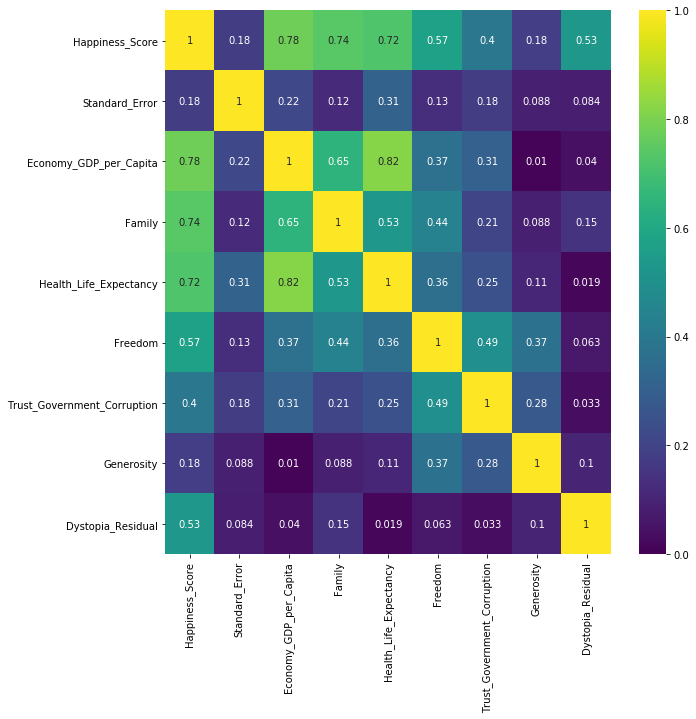

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2015.corr().abs(), vmin=0, vmax=1, cmap="viridis", annot=True)
plt.show()

GDP per capita is highly correlated with happiness score. Also, Family and health life expectancy are related with happiness score. 
Freedom and government corruption affect also happiness score.
Generosity has the lowest effect on happiness score. 

#### Correlation between Variables for each Continent

In [35]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [36]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 17 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 12 }

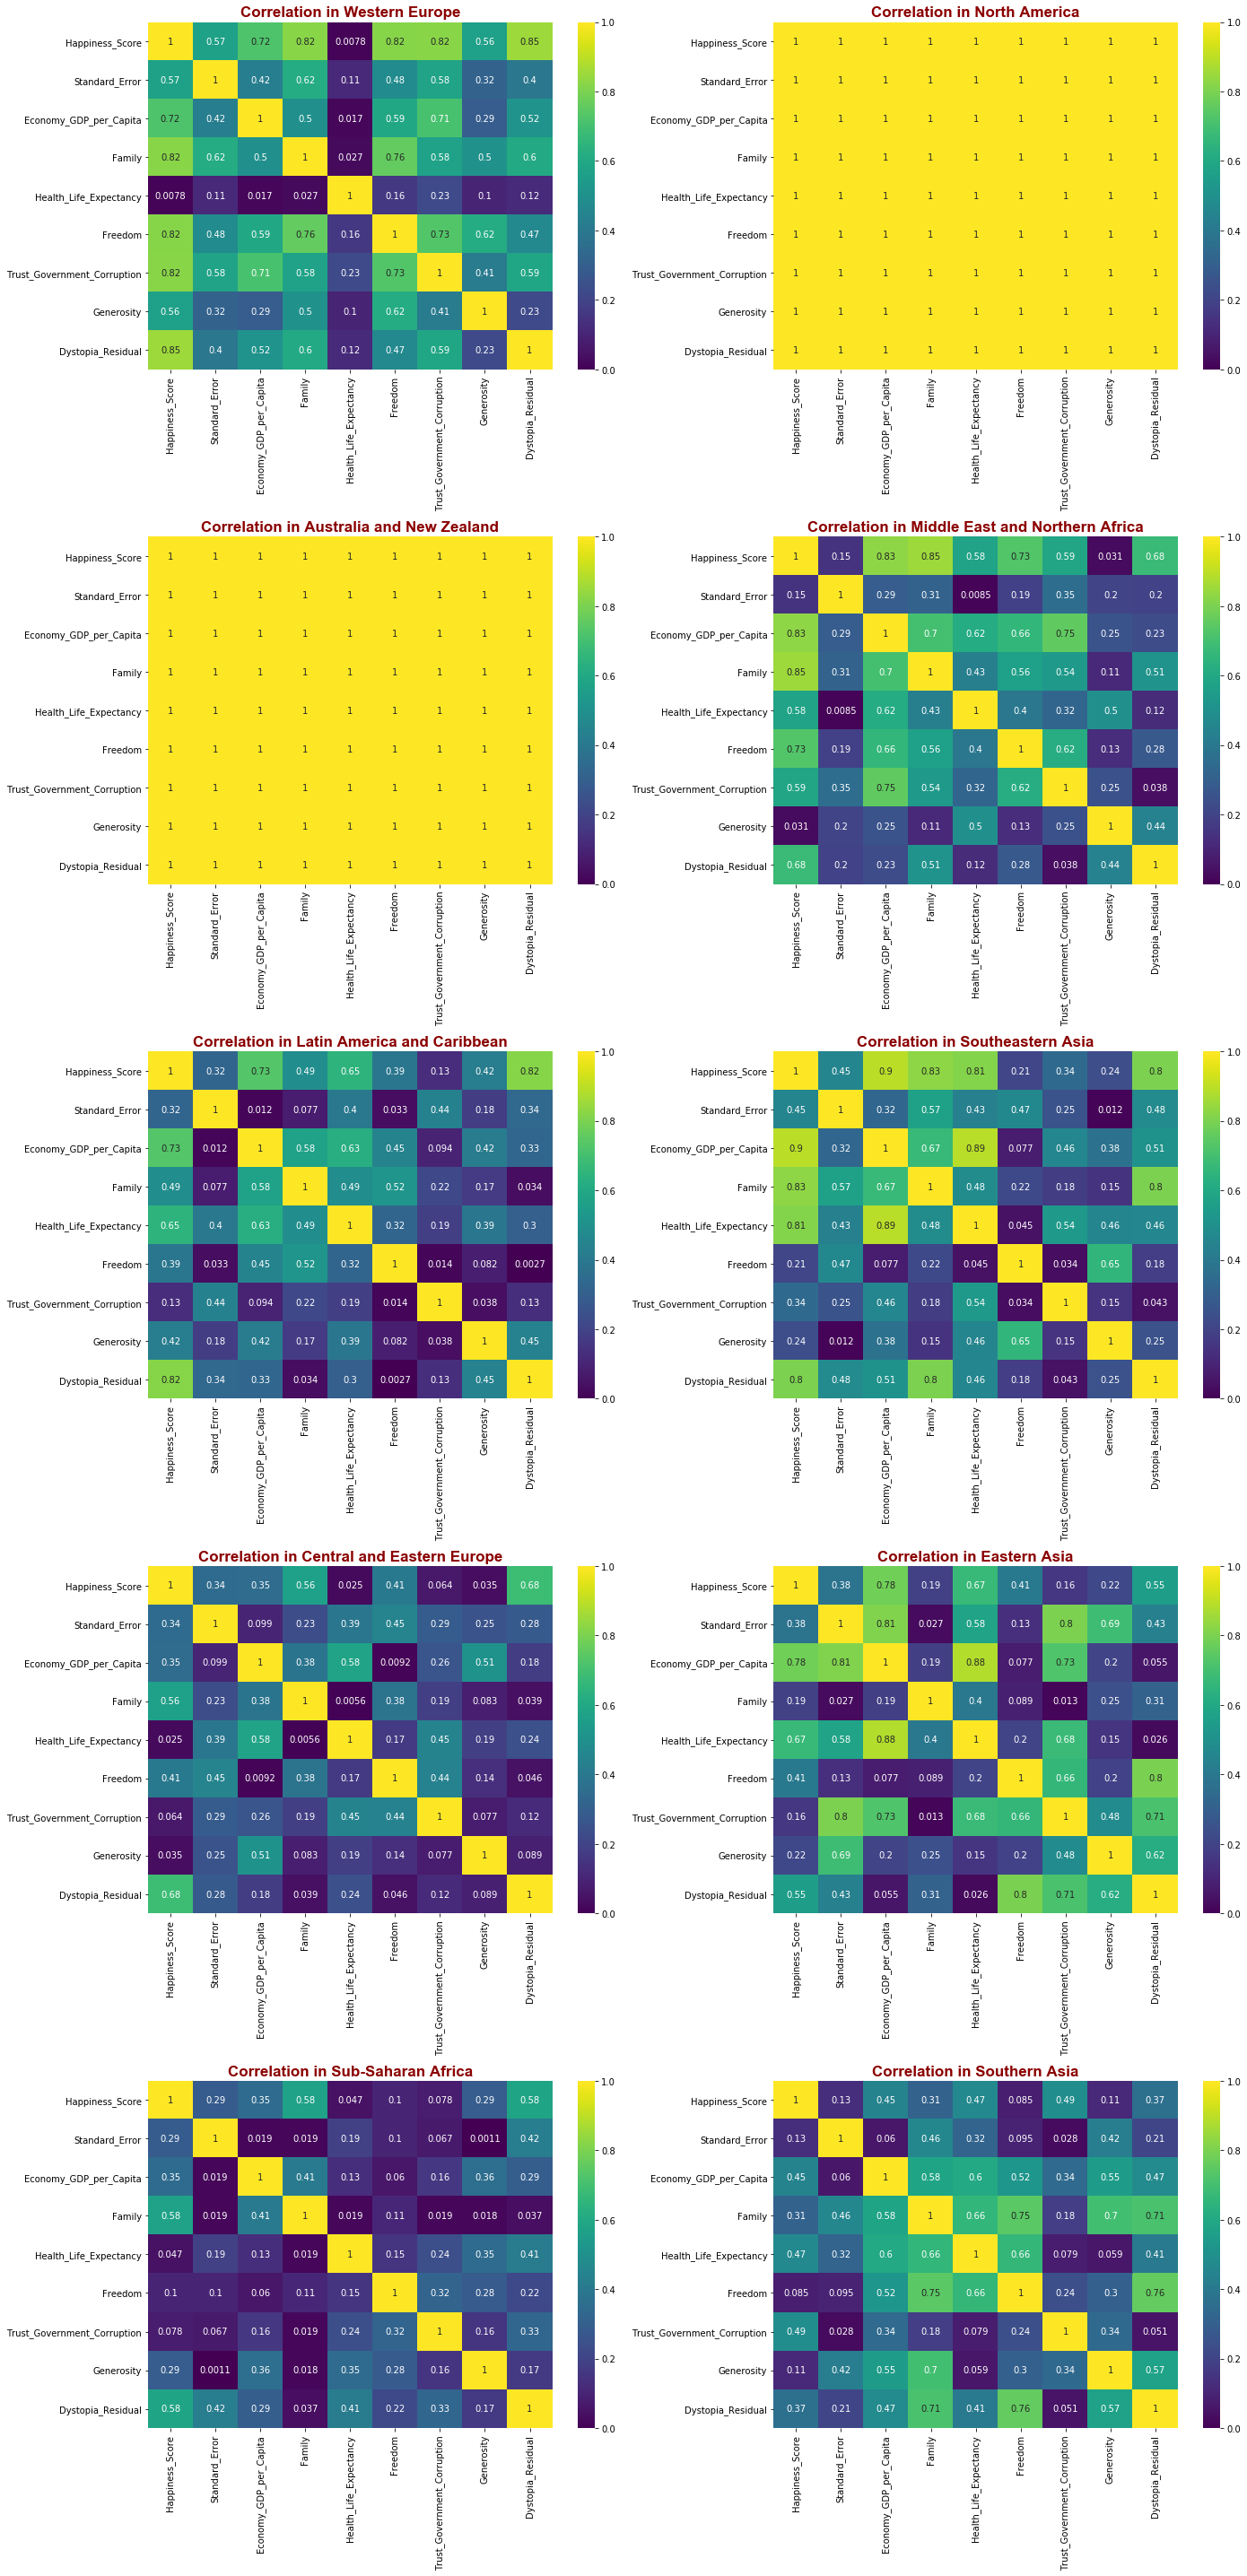

In [37]:
plt.figure(figsize=(20,40))
for i, region in enumerate(df.Region.unique()):
    plt.subplot(5,2,i+1)     
    df_regional=df_2015[df_2015.Region==region]
    df_regional=df_regional.corr().abs()
    sns.heatmap(df_regional, vmin=0, vmax=1, cmap="viridis", annot=True)
    plt.title('Correlation in {}'.format(region),title_font)
plt.tight_layout()
plt.show()

#### Comments

GDP per Capita has main effect on happiness in most of continents.

Health Life Expectancy has very low effect in Western Europe.

Family is the most effective factor in Central and Western Europe, Sub-Saharan Africa, Middle-East and Northen Africa.In addition, it is very low effect in Eastern Asia.


### Geographical Visualization of Happiness Score

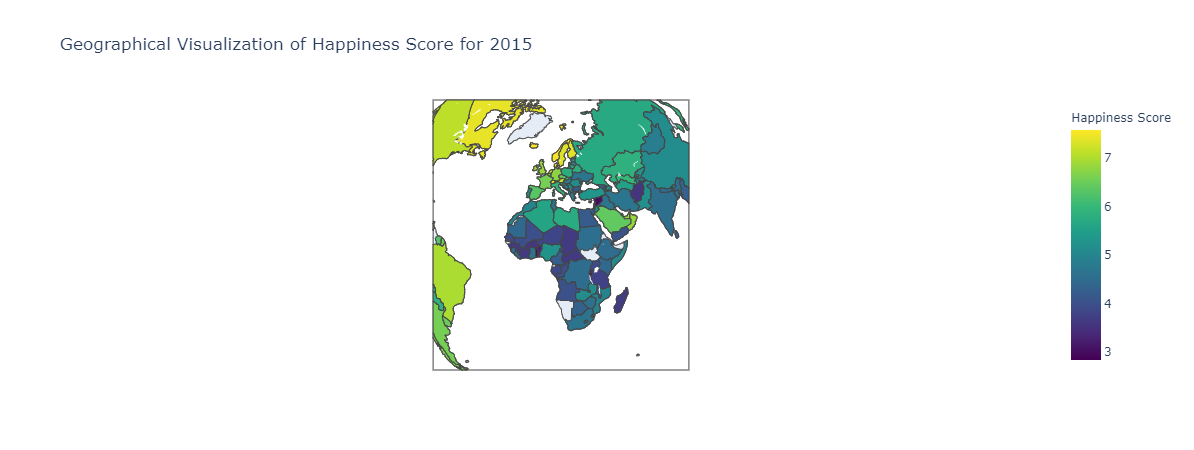

In [38]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='Viridis',
           z = df['Happiness_Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score for 2015', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap  = go.Figure(data = [data], layout=layout)
iplot(choromap )

In [39]:
df2=pd.read_csv('datasets_894_813759_2016.csv')

In [40]:
df2.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [41]:
df2['Year']=2016

In [42]:
df2.columns=['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval','Upper_Confidence_Interval', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual', 'Year']

In [43]:
df2.isnull().sum()

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Lower_Confidence_Interval      0
Upper_Confidence_Interval      0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
Year                           0
dtype: int64

In [44]:
df3=pd.read_csv('datasets_894_813759_2017.csv')

In [45]:
df3.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [46]:
df3['Year']=2017

In [47]:
df3.columns=['Country', 'Happiness_Rank', 'Happiness_Score',
       'Whisker_high','Whisker_low', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity','Trust_Government_Corruption',
        'Dystopia_Residual', 'Year']

In [48]:
df3.isnull().sum()

Country                        0
Happiness_Rank                 0
Happiness_Score                0
Whisker_high                   0
Whisker_low                    0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Generosity                     0
Trust_Government_Corruption    0
Dystopia_Residual              0
Year                           0
dtype: int64

In [49]:
df4=pd.read_csv('datasets_894_813759_2018.csv')

In [50]:
df4['Year']=2018

In [51]:
df4.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  Year  
0                      0.393  2018  
1                      0.340  2018  
2                      0.408  2018  
3                      0.138  2018  
4                      0.357  2018

In [52]:
df4.columns=['Happiness_Rank', 'Country', 'Happiness_Score',
        'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity','Trust_Government_Corruption','Year']

In [53]:
df4.isnull().sum()

Happiness_Rank                 0
Country                        0
Happiness_Score                0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Generosity                     0
Trust_Government_Corruption    1
Year                           0
dtype: int64

In [54]:
df4.columns

Index(['Happiness_Rank', 'Country', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Year'],
      dtype='object')

In [55]:
df5=pd.read_csv('datasets_894_813759_2019.csv')

In [56]:
df5['Year']=2019

In [57]:
df5.columns=['Happiness_Rank', 'Country', 'Happiness_Score',
        'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity','Trust_Government_Corruption','Year']

In [58]:
df4[df4.Trust_Government_Corruption.isnull()]

Happiness_Rank               Country  Happiness_Score  \
19              20  United Arab Emirates            6.774   

    Economy_GDP_per_Capita  Family  Health_Life_Expectancy  Freedom  \
19                   2.096   0.776                    0.67    0.284   

    Generosity  Trust_Government_Corruption  Year  
19       0.186                          NaN  2018

in Year 2018 United Arab Emirates have a missing value in Trust Government Corruption

In [59]:
df.loc[df.Country=='United Arab Emirates','Trust_Government_Corruption']

19    0.38583
Name: Trust_Government_Corruption, dtype: float64

In [60]:
df2.loc[df2.Country=='United Arab Emirates','Trust_Government_Corruption']

27    0.35561
Name: Trust_Government_Corruption, dtype: float64

In [61]:
df3.loc[df3.Country=='United Arab Emirates','Trust_Government_Corruption']

20    0.32449
Name: Trust_Government_Corruption, dtype: float64

In [62]:
df5.loc[df5.Country=='United Arab Emirates','Trust_Government_Corruption']

20    0.182
Name: Trust_Government_Corruption, dtype: float64

let's take average of 4 years and write it in year 2018.

In [63]:
average=(df.loc[df.Country=='United Arab Emirates','Trust_Government_Corruption'][19]+df2.loc[df2.Country=='United Arab Emirates','Trust_Government_Corruption'][27]+df3.loc[df3.Country=='United Arab Emirates','Trust_Government_Corruption'][20]+df5.loc[df5.Country=='United Arab Emirates','Trust_Government_Corruption'][20])/4

In [64]:
average

0.3119823909258842

In [65]:
df4['Trust_Government_Corruption'].fillna(average, inplace=True)

In [66]:
df4.isnull().sum()

Happiness_Rank                 0
Country                        0
Happiness_Score                0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Generosity                     0
Trust_Government_Corruption    0
Year                           0
dtype: int64

In [67]:
df5.head()

Happiness_Rank      Country  Happiness_Score  Economy_GDP_per_Capita  \
0               1      Finland            7.769                   1.340   
1               2      Denmark            7.600                   1.383   
2               3       Norway            7.554                   1.488   
3               4      Iceland            7.494                   1.380   
4               5  Netherlands            7.488                   1.396   

   Family  Health_Life_Expectancy  Freedom  Generosity  \
0   1.587                   0.986    0.596       0.153   
1   1.573                   0.996    0.592       0.252   
2   1.582                   1.028    0.603       0.271   
3   1.624                   1.026    0.591       0.354   
4   1.522                   0.999    0.557       0.322   

   Trust_Government_Corruption  Year  
0                        0.393  2019  
1                        0.410  2019  
2                        0.341  2019  
3                        0.118  2019  
4                        0.298  2019

In [68]:
df5.isnull().sum()

Happiness_Rank                 0
Country                        0
Happiness_Score                0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Generosity                     0
Trust_Government_Corruption    0
Year                           0
dtype: int64

In [69]:
df2.loc[df2.Country=='North Cyprus','Country']='Northern Cyprus'

In [70]:
df3.loc[df3.Country=='North Cyprus','Country']='Northern Cyprus'

In [71]:
df3.loc[df3.Country=='Taiwan Province of China','Country']='Taiwan'

In [72]:
df3.loc[df3.Country=='Hong Kong S.A.R., China','Country']='Hong Kong'

In [73]:
df4[df4.Country=='Trinidad & Tobago']='Trinidad and Tobago'

In [74]:
df5.loc[df5.Country=='Trinidad & Tobago','Country']='Trinidad and Tobago'

In [69]:
df_all=pd.concat([df,df2,df3,df4,df5], ignore_index=True)

In [70]:
df_all

Country          Region  Happiness_Rank  \
0                 Switzerland  Western Europe               1   
1                     Iceland  Western Europe               2   
2                     Denmark  Western Europe               3   
3                      Norway  Western Europe               4   
4                      Canada   North America               5   
..                        ...             ...             ...   
777                    Rwanda             NaN             152   
778                  Tanzania             NaN             153   
779               Afghanistan             NaN             154   
780  Central African Republic             NaN             155   
781               South Sudan             NaN             156   

     Happiness_Score  Standard_Error  Economy_GDP_per_Capita   Family  \
0              7.587         0.03411                 1.39651  1.34951   
1              7.561         0.04884                 1.30232  1.40223   
2              7.527         0.03328                 1.32548  1.36058   
3              7.522         0.03880                 1.45900  1.33095   
4              7.427         0.03553                 1.32629  1.32261   
..               ...             ...                     ...      ...   
777            3.334             NaN                 0.35900  0.71100   
778            3.231             NaN                 0.47600  0.88500   
779            3.203             NaN                 0.35000  0.51700   
780            3.083             NaN                 0.02600  0.00000   
781            2.853             NaN                 0.30600  0.57500   

     Health_Life_Expectancy  Freedom  Trust_Government_Corruption  Generosity  \
0                   0.94143  0.66557                      0.41978     0.29678   
1                   0.94784  0.62877                      0.14145     0.43630   
2                   0.87464  0.64938                      0.48357     0.34139   
3                   0.88521  0.66973                      0.36503     0.34699   
4                   0.90563  0.63297                      0.32957     0.45811   
..                      ...      ...                          ...         ...   
777                 0.61400  0.55500                      0.41100     0.21700   
778                 0.49900  0.41700                      0.14700     0.27600   
779                 0.36100  0.00000                      0.02500     0.15800   
780                 0.10500  0.22500                      0.03500     0.23500   
781                 0.29500  0.01000                      0.09100     0.20200   

     Dystopia_Residual  Year Economy_GDP_per_Capita_Group  \
0              2.51738  2015                         high   
1              2.70201  2015                         high   
2              2.49204  2015                         high   
3              2.46531  2015                         high   
4              2.45176  2015                         high   
..                 ...   ...                          ...   
777                NaN  2019                          NaN   
778                NaN  2019                          NaN   
779                NaN  2019                          NaN   
780                NaN  2019                          NaN   
781                NaN  2019                          NaN   

     Lower_Confidence_Interval  Upper_Confidence_Interval  Whisker_high  \
0                          NaN                        NaN           NaN   
1                          NaN                        NaN           NaN   
2                          NaN                        NaN           NaN   
3                          NaN                        NaN           NaN   
4                          NaN                        NaN           NaN   
..                         ...                        ...           ...   
777                        NaN                        NaN           NaN   
778                        NaN                        NaN 

Since there is no Region column in years 2017,2018,2019. Let's add Region column for them.

In [71]:
for year in [2017, 2018, 2019]:
    for region in df_all.Region.unique():
        for country in df_all[df_all.Region == region].Country.unique():
            df_all.loc[(df_all.Country == country) & (df_all.Year == year), 'Region'] = region

In [72]:
df_all.tail(10)

Country                           Region  \
772                     Haiti      Latin America and Caribbean   
773                  Botswana               Sub-Saharan Africa   
774                     Syria  Middle East and Northern Africa   
775                    Malawi               Sub-Saharan Africa   
776                     Yemen  Middle East and Northern Africa   
777                    Rwanda               Sub-Saharan Africa   
778                  Tanzania               Sub-Saharan Africa   
779               Afghanistan                    Southern Asia   
780  Central African Republic               Sub-Saharan Africa   
781               South Sudan               Sub-Saharan Africa   

     Happiness_Rank  Happiness_Score  Standard_Error  Economy_GDP_per_Capita  \
772             147            3.597             NaN                   0.323   
773             148            3.488             NaN                   1.041   
774             149            3.462             NaN                   0.619   
775             150            3.410             NaN                   0.191   
776             151            3.380             NaN                   0.287   
777             152            3.334             NaN                   0.359   
778             153            3.231             NaN                   0.476   
779             154            3.203             NaN                   0.350   
780             155            3.083             NaN                   0.026   
781             156            2.853             NaN                   0.306   

     Family  Health_Life_Expectancy  Freedom  Trust_Government_Corruption  \
772   0.688                   0.449    0.026                        0.110   
773   1.145                   0.538    0.455                        0.100   
774   0.378                   0.440    0.013                        0.141   
775   0.560                   0.495    0.443                        0.089   
776   1.163                   0.463    0.143                        0.077   
777   0.711                   0.614    0.555                        0.411   
778   0.885                   0.499    0.417                        0.147   
779   0.517                   0.361    0.000                        0.025   
780   0.000                   0.105    0.225                        0.035   
781   0.575                   0.295    0.010                        0.091   

     Generosity  Dystopia_Residual  Year Economy_GDP_per_Capita_Group  \
772       0.419                NaN  2019                          NaN   
773       0.025                NaN  2019                          NaN   
774       0.331                NaN  2019                          NaN   
775       0.218                NaN  2019                          NaN   
776       0.108                NaN  2019                          NaN   
777       0.217                NaN  2019                          NaN   
778       0.276                NaN  2019                          NaN   
779       0.158                NaN  2019                          NaN   
780       0.235                NaN  2019                          NaN   
781       0.202                NaN  2019                          NaN   

     Lower_Confidence_Interval  Upper_Confidence_Interval  Whisker_high  \
772                        NaN                        NaN           NaN   
773                        NaN                        NaN           NaN   
774                        NaN                        NaN           NaN   
775                        NaN                        NaN           NaN   
776                        NaN                        NaN           NaN   
777                        NaN                        NaN           NaN   
778                        NaN                        NaN           NaN   
779                        NaN                        NaN           NaN   
780                        NaN                        NaN           NaN   
781         

In Data, different names are used for the same countries. Let's write same names for them.

In [73]:
title_style = {'family': 'Arial', 'color': 'darkred', 'size': 18 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 15 }

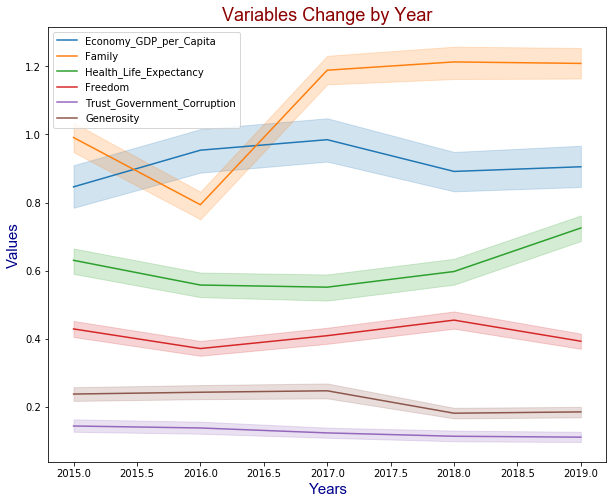

In [74]:
plt.figure(figsize=(10,8))
for column in df.columns[5:-3]:
    sns.lineplot(x="Year", y=column,data=df_all, label=column)
    plt.title('Variables Change by Year', fontdict = title_style)
    plt.xlabel('Years', fontdict = axis_style)
    plt.ylabel('Values', fontdict = axis_style)
plt.legend()
plt.show()

Economy GDP per Capita increase between 2015-2017. After 2017 it starts to decreasing.
Family Relationships in the world is decreased between 2015 and 2016, then increased after 2016.
Health Life Expectancy decreased by 2016. After 2017 it starts increasing.
Government Trust and Generosity are very little changed.

### Happiness Score Comparison for some Countries

Let's compare Turkey's and Germany's happiness between 2015-2019

In [75]:
df_GE=df_all.loc[df_all['Country']=='Germany']

In [76]:
df_TR=df_all.loc[df_all['Country']=='Turkey']

In [77]:
df_all_TR_GE=df_all[df_all.Country.isin(['Germany','Turkey'])]

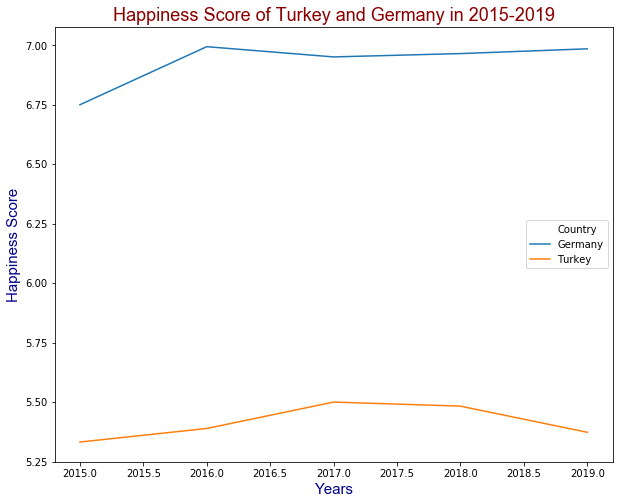

In [78]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Year", y="Happiness_Score",data=df_all_TR_GE, hue='Country')
plt.title("Happiness Score of Turkey and Germany in 2015-2019",fontdict = title_style)
plt.xlabel('Years', fontdict = axis_style)
plt.ylabel('Happiness Score', fontdict = axis_style)
plt.show()

Turkey's happiness increased surprisingly between 2015-2017 despites the events in the country.Then, it start to decrease very little after 2017.
Germany's happiness increased between 2015-2016.Then, it start to decrease very little after 2017.After 2017 it remains constant.

In [79]:
df_all.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False).reset_index()

Country  Happiness_Score
0                     Denmark          7.54600
1                      Norway          7.54100
2                     Finland          7.53780
3                 Switzerland          7.51140
4                     Iceland          7.51100
..                        ...              ...
165                    Rwanda          3.43860
166               South Sudan          3.38250
167                     Syria          3.29220
168  Central African Republic          3.13425
169                   Burundi          3.07900

[170 rows x 2 columns]

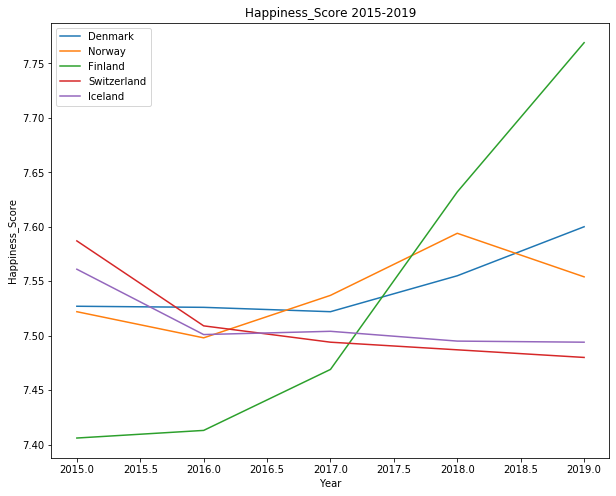

In [80]:
plt.figure(figsize=(10,8))
countries=['Denmark','Norway','Finland','Switzerland','Iceland']
for country in countries:
    df_c=df_all[df_all['Country']==country]
    sns.lineplot(x="Year", y="Happiness_Score",data=df_c,label=country)
plt.title("Happiness_Score 2015-2019")
plt.show()
 

Finlands happiness is increased after 2017 and Finland takes number 1.

In [81]:
df_all.head()

Country          Region  Happiness_Rank  Happiness_Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard_Error  Economy_GDP_per_Capita   Family  Health_Life_Expectancy  \
0         0.03411                 1.39651  1.34951                 0.94143   
1         0.04884                 1.30232  1.40223                 0.94784   
2         0.03328                 1.32548  1.36058                 0.87464   
3         0.03880                 1.45900  1.33095                 0.88521   
4         0.03553                 1.32629  1.32261                 0.90563   

   Freedom  Trust_Government_Corruption  Generosity  Dystopia_Residual  Year  \
0  0.66557                      0.41978     0.29678            2.51738  2015   
1  0.62877                      0.14145     0.43630            2.70201  2015   
2  0.64938                      0.48357     0.34139            2.49204  2015   
3  0.66973                      0.36503     0.34699            2.46531  2015   
4  0.63297                      0.32957     0.45811            2.45176  2015   

  Economy_GDP_per_Capita_Group  Lower_Confidence_Interval  \
0                         high                        NaN   
1                         high                        NaN   
2                         high                        NaN   
3                         high                        NaN   
4                         high                        NaN   

   Upper_Confidence_Interval  Whisker_high  Whisker_low  
0                        NaN           NaN          NaN  
1                        NaN           NaN          NaN  
2                        NaN           NaN          NaN  
3                        NaN           NaN          NaN  
4                        NaN           NaN          NaN

Let's look at the 10 countries whose happiness has increased and decreased the most in 5 years.


### Top 10 Countries Increased and Decreased Their Happiness between 2015-2019

In [82]:
countries=[]
happiness_difference=[]
for country in df.Country.unique():
    for country2 in df5.Country.unique():
        if country==country2:
            x=df.loc[(df.Country == country) & (df.Year == 2015), 'Happiness_Score'].reset_index()['Happiness_Score'][0]
            y=df5.loc[(df5.Country == country) & (df5.Year == 2019), 'Happiness_Score'].reset_index()['Happiness_Score'][0]
            z=y-x
            happiness_difference.append(z)
            countries.append(country)
df_difference=pd.DataFrame({'Country': countries,
                 'Happiness_Difference': happiness_difference})

In [83]:
df_difference.sort_values('Happiness_Difference',ascending=False).head(10)

Country  Happiness_Difference
145         Benin                 1.543
141   Ivory Coast                 1.289
148          Togo                 1.246
98       Honduras                 1.072
142  Burkina Faso                 1.000
97        Hungary                 0.958
81        Romania                 0.946
133         Gabon                 0.903
135      Cambodia                 0.881
140        Guinea                 0.878

Countries whose happiness are increasing Guinea,Cambodia,Gabon,Romania,Hungary,Burkina Faso,Honduras,Togo,Ivory Coast,Benin

In [84]:
df_difference.sort_values('Happiness_Difference').head(10)

Country  Happiness_Difference
21   Venezuela                -2.103
90     Lesotho                -1.096
80      Zambia                -1.022
108   Zimbabwe                -0.947
111      Haiti                -0.921
122     Malawi                -0.882
119   Botswana                -0.844
127      Yemen                -0.697
15      Brazil                -0.683
94   Swaziland                -0.655

Countries whose happiness are decreasing Venezuela, Lesotho,Zambia,Zimbabwe,Haiti,Malawi,Botswana, Yemen, Brazil and Swaziland

### PCA Analysis

for Happiness Score data year 2015

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [86]:
categorical_features=df.dtypes[df.dtypes=='object'].index

In [87]:
categorical_features

Index(['Country', 'Region', 'Economy_GDP_per_Capita_Group'], dtype='object')

In [88]:
df_pca=df.drop(['Country'], axis=1)

In [89]:
df_pca2=df_pca.drop(['Region','Economy_GDP_per_Capita_Group'], axis=1)

In [90]:
pd.get_dummies(df_pca[["Region","Economy_GDP_per_Capita_Group"]])

Region_Australia and New Zealand  Region_Central and Eastern Europe  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   
..                                ...                                ...   
153                                 0                                  0   
154                                 0                                  0   
155                                 0                                  0   
156                                 0                                  0   
157                                 0                                  0   

     Region_Eastern Asia  Region_Latin America and Caribbean  \
0                      0                                   0   
1                      0                                   0   
2                      0                                   0   
3                      0                                   0   
4                      0                                   0   
..                   ...                                 ...   
153                    0                                   0   
154                    0                                   0   
155                    0                                   0   
156                    0                                   0   
157                    0                                   0   

     Region_Middle East and Northern Africa  Region_North America  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     1   
..                                      ...                   ...   
153                                       0                     0   
154                                       0                     0   
155                                       1                     0   
156                                       0                     0   
157                                       0                     0   

     Region_Southeastern Asia  Region_Southern Asia  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   
..                        ...                   ...   
153                         0                     0   
154                         0                     0   
155                         0                     0   
156                         0                     0   
157                         0                     0   

     Region_Sub-Saharan Africa  Region_Western Europe  \
0                            0                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      0   
..                         ...                    ...   
153                          1                      0   
154                          1                      0   
155                          0                      0   
156                          1                      0   
157                          1                      0   

     Economy_GDP_per_Capita_Group_high  Economy_GDP_per_Capita_Group_low  \
0                                    1                                 0

In [91]:
df_pca3=pd.concat([df_pca2,pd.get_dummies(df_pca[["Region","Economy_GDP_per_Capita_Group"]])], axis=1)

In [92]:
df_pca3

Happiness_Rank  Happiness_Score  Standard_Error  Economy_GDP_per_Capita  \
0                 1            7.587         0.03411                 1.39651   
1                 2            7.561         0.04884                 1.30232   
2                 3            7.527         0.03328                 1.32548   
3                 4            7.522         0.03880                 1.45900   
4                 5            7.427         0.03553                 1.32629   
..              ...              ...             ...                     ...   
153             154            3.465         0.03464                 0.22208   
154             155            3.340         0.03656                 0.28665   
155             156            3.006         0.05015                 0.66320   
156             157            2.905         0.08658                 0.01530   
157             158            2.839         0.06727                 0.20868   

      Family  Health_Life_Expectancy  Freedom  Trust_Government_Corruption  \
0    1.34951                 0.94143  0.66557                      0.41978   
1    1.40223                 0.94784  0.62877                      0.14145   
2    1.36058                 0.87464  0.64938                      0.48357   
3    1.33095                 0.88521  0.66973                      0.36503   
4    1.32261                 0.90563  0.63297                      0.32957   
..       ...                     ...      ...                          ...   
153  0.77370                 0.42864  0.59201                      0.55191   
154  0.35386                 0.31910  0.48450                      0.08010   
155  0.47489                 0.72193  0.15684                      0.18906   
156  0.41587                 0.22396  0.11850                      0.10062   
157  0.13995                 0.28443  0.36453                      0.10731   

     Generosity  Dystopia_Residual  ...  Region_Latin America and Caribbean  \
0       0.29678            2.51738  ...                                   0   
1       0.43630            2.70201  ...                                   0   
2       0.34139            2.49204  ...                                   0   
3       0.34699            2.46531  ...                                   0   
4       0.45811            2.45176  ...                                   0   
..          ...                ...  ...                                 ...   
153     0.22628            0.67042  ...                                   0   
154     0.18260            1.63328  ...                                   0   
155     0.47179            0.32858  ...                                   0   
156     0.19727            1.83302  ...                                   0   
157     0.16681            1.56726  ...                                   0   

     Region_Middle East and Northern Africa  Region_North America  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     1   
..                                      ...                   ...   
153                                       0                     0   
154                                       0                     0   
155                                       1                     0   
156                                       0                     0   
157                                       0                     0   

     Region_Southeastern Asia  Region_Southern Asia  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   

In [93]:
x=StandardScaler().fit_transform(df_pca3)
pca=PCA(n_components=0.8)
principalComponents=pca.fit_transform(x)

In [94]:
pd.DataFrame(principalComponents)

0         1         2         3         4         5         6  \
0    5.331451  1.666187 -0.247057  0.165930 -0.917574  0.522977 -0.179608   
1    4.804968  1.096230 -0.764729  0.261839 -0.170098  0.521439 -0.144305   
2    5.274640  2.003002 -0.231832  0.401187 -0.965022  0.531729 -0.108964   
3    5.153956  1.679380 -0.304199  0.273460 -0.759800  0.422522 -0.166092   
4    5.145365  2.012064 -0.203223  1.710063 -1.054820  1.641185  4.646456   
..        ...       ...       ...       ...       ...       ...       ...   
153 -2.325919  3.598998  0.573996  0.215742 -0.571649 -1.090786 -0.045159   
154 -3.791125  1.878388 -0.088255 -0.196781 -0.170920  0.071637 -0.198684   
155 -2.516051  0.451349  4.012346  1.386559 -1.205541 -1.057748 -0.564247   
156 -5.121928  1.147851 -1.017168 -0.010230 -1.089205 -0.367865  0.002271   
157 -4.721248  1.675102 -0.399473  0.039168 -0.742954 -0.323847 -0.221426   

            7         8         9  
0   -0.748638 -0.997782 -1.408380  
1   -1.103249 -1.004485 -0.719267  
2   -0.667094 -0.996860 -1.507829  
3   -0.822774 -1.007699 -1.257515  
4   -3.393333  4.808572  2.760216  
..        ...       ...       ...  
153  0.412592  0.101123 -1.203687  
154 -0.141204  0.111552 -0.195234  
155  0.648500 -0.479403  1.115063  
156 -0.094106  0.004375  0.273893  
157 -0.055204  0.003267  0.123645  

[158 rows x 10 columns]

In [95]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [96]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print('-'*75)
print(cumsum_var)


[0.26534273 0.10290946 0.08412355 0.08258238 0.06451835 0.05262657
 0.04779404 0.04615163 0.04578106 0.04221808]
---------------------------------------------------------------------------
[26.53 36.82 45.23 53.49 59.94 65.2  69.98 74.6  79.18 83.4 ]


So, with 10 components, I got the %83 of knowledge of data.

First component explains %26.53 percent of our data, Second one explains %11.29 and together it is 36.82.Then, it continues by decreasing.

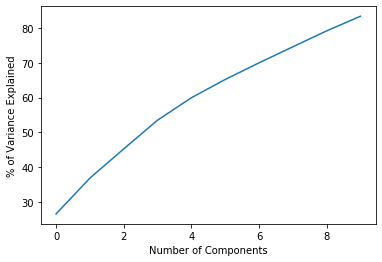

In [97]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.show()

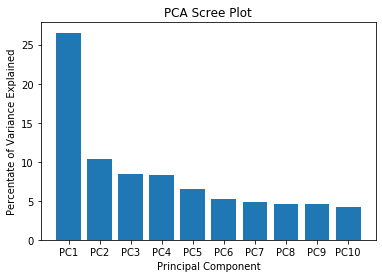

In [98]:
# Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [99]:
x = pd.DataFrame(x, columns=df_pca3.columns)

In [100]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


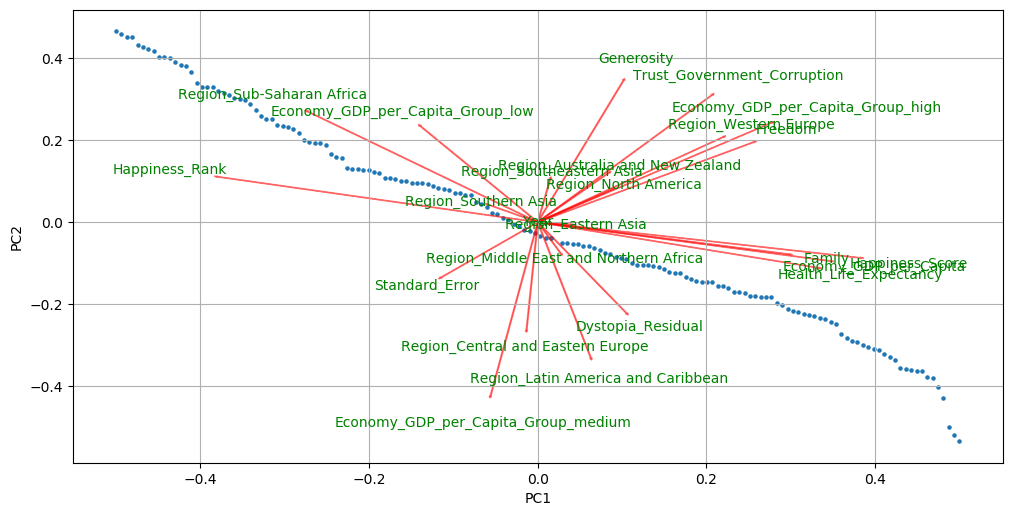

In [101]:
myplot(np.array(x)[:,0:2],np.transpose(pca.components_[0:2, :]),list(x.columns))
plt.show()

## Conclusion

In my report, Initially, I give brief information about World Happiness Record.I checked missing values. There is only 1 missing value in year 2018 in Trust Government Corruption for United Arab Emirates. I filled out it with average of other years.I checked outliers with boxplot and zscore. There are 2 outliers in Trust Government Corruption. I winsorized it. I created new column for Economy GDP_per_Capita and compared whether variables are different or not for countries having high and low GDP. They are different.I showed number of countries in each continent by pieplot, and the effect of variables on Happiness Score in general and then for I compared them for each continent.Correlation between variables in general and for each continent are showed by heatmap. 
Geographical visualization of Happiness Score is plotted and change of variables by years is plotted.Then, I compared Happiness Score of Turkey and Germany. Then, I made groupby countries by Happiness score and took averages of them. Denmark, Norway, Finland, Switzerland, Iceland are most happy countries.I found countries which increased their happiness maximum and countries which decreased their happiness maximum. Lastly, I have done PCA Analysis for 2015 year data, althought it is not very useful for limited numerical variables.

### Raporda yapilabilecekler

research question farkli yazilir
winsorize yüzde 10
ttest iyi
effectlerin icinde
    grafikler büyük olabilir
    correlation
happiness i etkileyen faktörler
görsellestirme
yil verilerini sonradan eklemek dikkat dagitici
verileri 2015,2016,2017,2018,2019 hepsini birlestirme
introduction
data analyis
